# Project description (Research on vehicle sales ads)

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

# Description of the data
**The dataset contains the following fields:** <br>
**price** <br>
**model_year** <br>
**model** <br>
**condition** <br>
**cylinders** <br>
**fuel** — gas, diesel, etc. <br>
**odometer** — the vehicle's mileage when the ad was published <br>
**transmission** <br>
**paint_color** <br>
**is_4wd** — whether the vehicle has 4-wheel drive (Boolean type) <br>
**date_posted** — the date the ad was published <br>
**days_listed** — from publication to removal <br>

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 
vehicles = pd.read_csv('/datasets/vehicles_us.csv')

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
vehicles.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
vehicles.duplicated().sum()

0

### Conclusion

I used the info() method to figure out what type pandas assigned to each column and printed the first 10 rows.

- There are missing values in 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd'.
- In 'model_year', 'cylinders', 'odometer', and 'is_4wd' are of type float64, it is better to correct it to integers for convenience.
- Column 'date_posted' not in date format.
- Column 'is_4wd' is bool
- There are no duplicates in the date

## Data preprocessing

In [5]:
#I looked at the percentage of missing values

display(vehicles.isna().sum()*100/len(vehicles))
display(pd.DataFrame(round((vehicles.isna().mean()*100),2)).style.background_gradient('coolwarm'))
vehicles.isna().mean() * 100 

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

,0
price,0
model_year,7.02
model,0
condition,0
cylinders,10.21
fuel,0
odometer,15.32
transmission,0
type,0
paint_color,17.99


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [6]:
vehicles['model_year'] = vehicles['model_year'].fillna(value=0) 
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(value=0) 

# I replaced null values with 0 in order to fill in those missing values.


In [7]:
vehicles.loc[vehicles['paint_color'].isna(), 'paint_color'] = '-'
#Replaced unknown color values with a dash

In [8]:
vehicles.paint_color.value_counts()

white     10029
-          9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [9]:
#vehicles.loc[vehicles['cylinders'].isna(), 'cylinders'] = vehicles['cylinders'].median()
#vehicles.loc[vehicles['odometer'].isna(), 'odometer'] = vehicles['odometer'].median()
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby(['model', 'model_year'])['cylinders'].transform('median'))

vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby(['condition', 'model_year'])['odometer'].transform('median'))


In [10]:
vehicles['cylinders'].isnull().sum()

26

In [11]:
vehicles['odometer'].isna().sum()

7

In [12]:
vehicles.loc[vehicles['cylinders'].isna(), 'cylinders'] = vehicles['cylinders'].median()
vehicles['odometer'] = vehicles['odometer'].fillna(value=0) 

In [13]:
vehicles['odometer'].isna().sum()

0

In [14]:
vehicles['cylinders'].isnull().sum()

0

In [15]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [16]:
vehicles['model_year'] = vehicles['model_year'].astype('int')
vehicles['cylinders'] = vehicles['cylinders'].astype('int')
vehicles['odometer'] = vehicles['odometer'].astype('int')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('int')
#Float64 value has been replaced with integers

In [17]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: int64(6), object(7)
memory usage: 5.1+ MB


In [18]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'])

In [19]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,-,1,2018-06-23,19
1,25500,0,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,-,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


### Conclusion

- All missing values have been filled in.
- Float64 value has been replaced with integers.
- Replaced unknown color values on "-".
- In the 'cylinders' and 'odometer' columns, the missing values have been replaced with the median.

## Make calculations and add them to the table

In [20]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

vehicles['weekday'] = pd.DatetimeIndex(vehicles['date_posted']).weekday
vehicles['month'] = pd.DatetimeIndex(vehicles['date_posted']).month
vehicles['year'] = pd.DatetimeIndex(vehicles['date_posted']).year
#Day of the week, month, and year the ad was placed

In [21]:
vehicles['age'] = vehicles['year'] - vehicles['model_year']
#The vehicle's age (in years) when the ad was placed

In [22]:
vehicles['avgerage_mileage_year'] = vehicles['odometer'] / vehicles['age']
#The vehicle's average mileage per year

In [23]:
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500           0      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    193850   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV           -       1  2018-06-23           19        5   
1    automatic  pickup       white       1  2018-10-19           50        4   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup           -       0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   

   month  year   age  avgerage_mileage_year  
0      6  

In [24]:
print(vehicles['age'].unique())

[   7 2018    6   16    2    4    3   11    1   10    5    8    0   15
   14    9   13   17   12   53 2019   24   18   19   26   22   38   20
   23   44   21   25   33   42   31   43   29   28   46   52   49   30
   40   54   39   50   27   32   55   37   56   34   45   41   51   63
   47   48   36   35   65   57   71   58   59  110   82   69   60   89]


In [25]:
def calculate_age(row):
    if row['age'] >= 2000:
        return 0
    else:
        return row['age']
#I removed the age of the cars over 2000 years

In [26]:
vehicles['age'] = vehicles.apply(calculate_age, axis = 1)

In [27]:
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500           0      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    193850   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV           -       1  2018-06-23           19        5   
1    automatic  pickup       white       1  2018-10-19           50        4   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup           -       0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   

   month  year  age  avgerage_mileage_year  
0      6  2

In [28]:
vehicles.groupby('condition')['model_year'].count()

condition
excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: model_year, dtype: int64

In [29]:
def numeric_scale(row):
    n =row['condition']
    if n == 'new':
        return 5
    if n == 'like new':
        return 4
    if n == 'excellent':
        return 3
    if n == 'good':
        return 2
    if n == 'fair':
        return 1
    else:
        return 0

In [30]:
vehicles['condition'] = vehicles.apply(numeric_scale, axis = 1)

In [31]:
vehicles.groupby('condition')['model_year'].count()

condition
0      115
1     1607
2    20145
3    24773
4     4742
5      143
Name: model_year, dtype: int64

In [32]:
vehicles.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avgerage_mileage_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51523.0
mean,12132.464920,1868.590121,2.637535,6.120097,115200.477826,0.496303,39.55476,3.005434,6.628491,2018.307462,7.955944,inf
std,10040.803015,513.626950,0.712447,1.656555,62189.664533,0.499991,28.20427,1.997759,3.474134,0.461447,6.452020,NaN
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.000000,0.0
25%,5000.000000,2005.000000,2.000000,4.000000,73239.000000,0.000000,19.00000,1.000000,3.000000,2018.000000,3.000000,10000.0
50%,9000.000000,2010.000000,3.000000,6.000000,114411.000000,0.000000,33.00000,3.000000,7.000000,2018.000000,7.000000,14800.0
75%,16839.000000,2014.000000,3.000000,8.000000,152381.000000,1.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21501.0
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,inf


In [33]:
def calculate_age(row):
    if row['age'] == 0:
        return row['odometer']
    else:
        return row['odometer'] / row['age']

In [34]:
vehicles['avgerage_mileage_year'] = vehicles.apply(calculate_age, axis = 1)

In [35]:
vehicles['avgerage_mileage_year'].describe() 

count     51525.000000
mean      24836.672563
std       32156.797969
min           0.000000
25%       11175.857143
50%       15846.153846
75%       23565.000000
max      415371.000000
Name: avgerage_mileage_year, dtype: float64

In [36]:
vehicles['avgerage_mileage_year'] = vehicles['avgerage_mileage_year'].astype('int')

In [37]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price                    51525 non-null int64
model_year               51525 non-null int64
model                    51525 non-null object
condition                51525 non-null int64
cylinders                51525 non-null int64
fuel                     51525 non-null object
odometer                 51525 non-null int64
transmission             51525 non-null object
type                     51525 non-null object
paint_color              51525 non-null object
is_4wd                   51525 non-null int64
date_posted              51525 non-null datetime64[ns]
days_listed              51525 non-null int64
weekday                  51525 non-null int64
month                    51525 non-null int64
year                     51525 non-null int64
age                      51525 non-null int64
avgerage_mileage_year    51525 non-null int64
dtypes: datetime64[ns](1), int64(12), object(5)
m

### Conclusion

- I added the columns for the day of the week, month and year of the ad
- Removed the age of cars more than 2000 years
- The vehicle's age (in years) when the ad was placed
- The average mileage of the car per year was calculated and the column 'avgerage_mileage_year' was added
- In the 'condition' column, replaced string values with a numeric scale
- Removed the error in the 'avgerage_mileage_year' column due to zero values in the age of the car

## Carry out exploratory data analysis

Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

The Histogram for the "Prise" parameter:


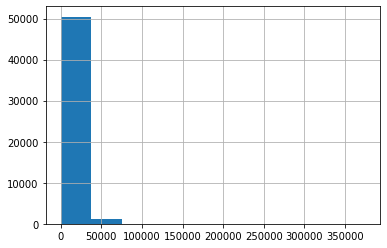

In [38]:
print('The Histogram for the "Prise" parameter:')
vehicles['price'].hist()
plt.show()
# The histogram shows that there are not a large number of cars more expensive than 70,000,
#and they are not visible on this histogram.

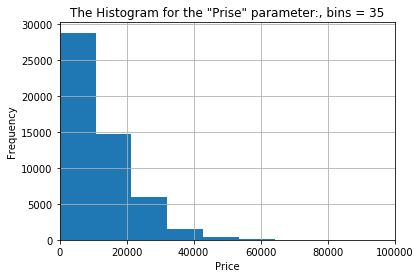

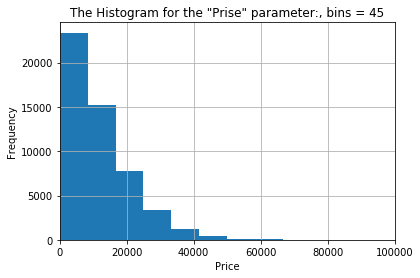

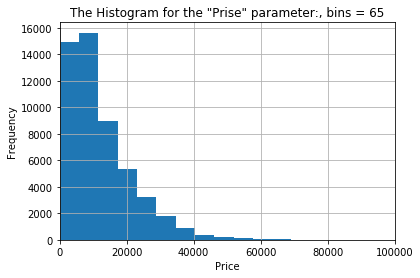

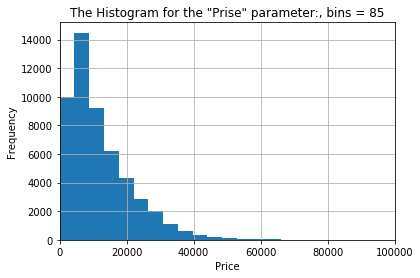

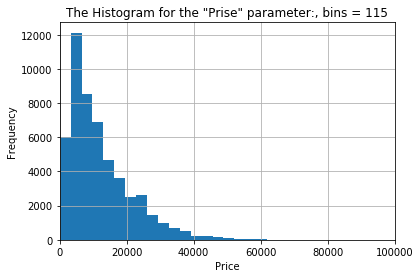

In [39]:
for i in [35, 45, 65, 85, 115]:
    
    vehicles['price'].hist(bins=i)

    plt.xlim(0,100000)

    plt.title('The Histogram for the "Prise" parameter:, bins = {}'.format(i))
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    plt.show() # remove text above the graph

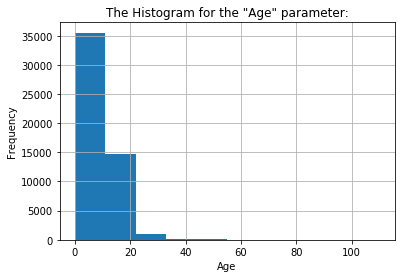

In [40]:
vehicles['age'].hist()
plt.title('The Histogram for the "Age" parameter:')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# The histogram shows that there are cars from 0 to 110 years old.

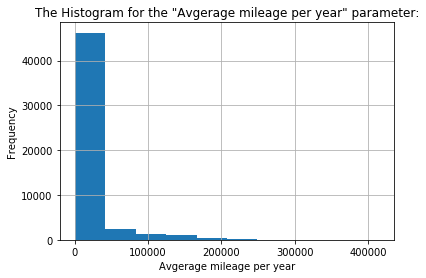

In [41]:
vehicles['avgerage_mileage_year'].hist()
plt.title('The Histogram for the "Avgerage mileage per year" parameter:')
plt.xlabel('Avgerage mileage per year')
plt.ylabel('Frequency')
plt.show()

The Histogram for the "Cylinders" parameter:


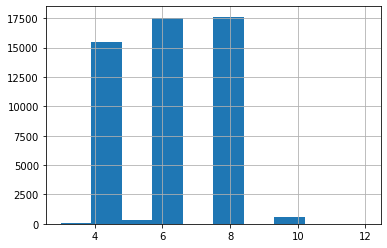

In [42]:
print('The Histogram for the "Cylinders" parameter:')
vehicles['cylinders'].hist()
plt.show()
#This histogram shows cylinders 1 through 12. Most machines have 6, 8 and 4 cylinders in descending order.

The Histogram for the "Condition" parameter:


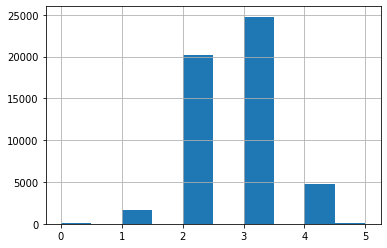

In [43]:
print('The Histogram for the "Condition" parameter:')
vehicles['condition'].hist()

plt.show()
#This histogram shows the 'condition' column from 1 to 5 as we replaced earlier. 
#Maximum number of cars in condition 3 and 2

Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

In [44]:
columns_to_plot = vehicles[['price', 'age', 'odometer', 'cylinders', 'condition']]
columns_to_plot.describe()

,price,age,odometer,cylinders,condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,7.955944,115200.477826,6.120097,2.637535
std,10040.803015,6.452020,62189.664533,1.656555,0.712447
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,5000.000000,3.000000,73239.000000,4.000000,2.000000
50%,9000.000000,7.000000,114411.000000,6.000000,3.000000
75%,16839.000000,12.000000,152381.000000,8.000000,3.000000
max,375000.000000,110.000000,990000.000000,12.000000,5.000000


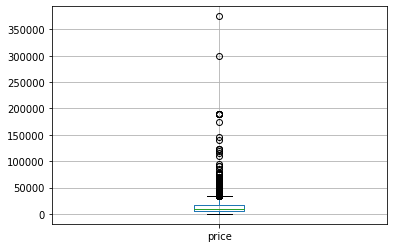

In [45]:
vehicles.boxplot(column ='price')
plt.show()

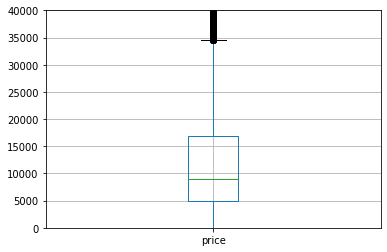

In [46]:
vehicles.boxplot(column ='price')
plt.ylim(0,40000)
plt.show()
#Can filter data after 35000, all value above are outliers. 
#I will check the exact number.

In [47]:
filtered_vehicles = vehicles.copy()

In [48]:
Q1 = vehicles['price'].quantile(.25)
Q3 = vehicles['price'].quantile(.75)
IQR = Q3-Q1
upper_outlier_price = Q3 + 1.5*IQR
print('Upper bound for price:', upper_outlier_price)

Upper bound for price: 34597.5


In [49]:
lower_outlier_price = Q1 - 1.5*IQR
print('Lower bound for price:', lower_outlier_price)

Lower bound for price: -12758.5


In [50]:
#filtered_vehicles.loc[filtered_vehicles['price'] == 1, 'price'] = filtered_vehicles['price'].median()
median_price = filtered_vehicles['price'].median() 
filtered_vehicles['price'] = filtered_vehicles['price'].replace(1, median_price)


In [51]:
vehicles['price'].min()

1

In [52]:
filtered_vehicles['price'].min()

3

In [53]:
filtered_vehicles['price'].describe()

count     51525.000000
mean      12271.838079
std        9933.321526
min           3.000000
25%        5400.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

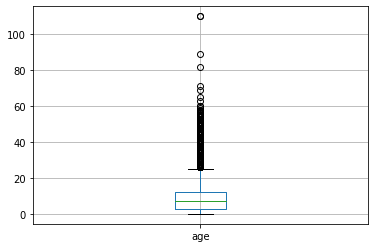

In [54]:
vehicles.boxplot(column ='age')
plt.show()

In [55]:
Q1 = vehicles['age'].quantile(.25)
Q3 = vehicles['age'].quantile(.75)
IQR = Q3-Q1
upper_outlier_age = Q3 + 1.5*IQR
print('Upper bound for age:', upper_outlier_age)

Upper bound for age: 25.5


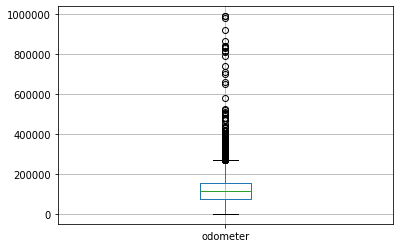

In [56]:
vehicles.boxplot(column ='odometer')
plt.show()

In [57]:
Q1 = vehicles['odometer'].quantile(.25)
Q3 = vehicles['odometer'].quantile(.75)
IQR = Q3-Q1
upper_outlier_odometer = Q3 + 1.5*IQR
print('Upper bound for odometer:', upper_outlier_odometer)

Upper bound for odometer: 271094.0


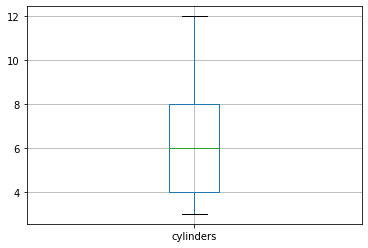

In [58]:
vehicles.boxplot(column ='cylinders')
plt.show()
#There are no outliers in this column

In [59]:
Q1 = vehicles['cylinders'].quantile(.25)
Q3 = vehicles['cylinders'].quantile(.75)
IQR = Q3-Q1
upper_outlier_cylinders = Q3 + 1.5*IQR
print('Upper bound for cylinders:', upper_outlier_cylinders)

Upper bound for cylinders: 14.0


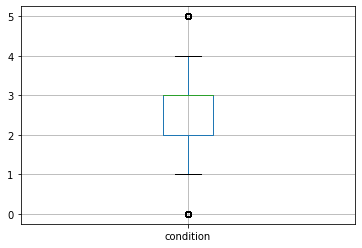

In [60]:
vehicles.boxplot(column ='condition')
plt.show()

In [61]:
Q1 = vehicles['condition'].quantile(.25)
Q3 = vehicles['condition'].quantile(.75)
IQR = Q3-Q1
upper_outlier_condition = Q3 + 1.5*IQR
print('Upper bound for condition:', upper_outlier_condition)

Upper bound for condition: 4.5


In [62]:
filtered_vehicles = filtered_vehicles[lower_outlier_price < filtered_vehicles.price ]
filtered_vehicles = filtered_vehicles[filtered_vehicles.price <= upper_outlier_price]
filtered_vehicles = filtered_vehicles[filtered_vehicles.age <= upper_outlier_age]
filtered_vehicles = filtered_vehicles[filtered_vehicles.odometer <= upper_outlier_odometer]
#The cylinder upper limit is greater than the highest value, so it doesn't change
filtered_vehicles = filtered_vehicles[filtered_vehicles.cylinders <= upper_outlier_cylinders]
#filtered_vehicles = filtered_vehicles[filtered_vehicles.condition <= upper_outlier_condition]

In [63]:
filtered_vehicles[['price', 'age', 'odometer', 'cylinders', 'condition']].describe().loc[['min', 'max']]

,price,age,odometer,cylinders,condition
min,3.0,0.0,0.0,3.0,0.0
max,34595.0,25.0,271093.0,12.0,5.0


In [64]:
qq = filtered_vehicles.copy()

qq.loc[qq.price < 500, 'price'] = qq.price.median()

qq.describe()['price']

count    48641.000000
mean     11391.442960
std       7652.269624
min        500.000000
25%       5495.000000
50%       9000.000000
75%      15988.000000
max      34595.000000
Name: price, dtype: float64

In [65]:
filtered_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48641 entries, 0 to 51524
Data columns (total 18 columns):
price                    48641 non-null int64
model_year               48641 non-null int64
model                    48641 non-null object
condition                48641 non-null int64
cylinders                48641 non-null int64
fuel                     48641 non-null object
odometer                 48641 non-null int64
transmission             48641 non-null object
type                     48641 non-null object
paint_color              48641 non-null object
is_4wd                   48641 non-null int64
date_posted              48641 non-null datetime64[ns]
days_listed              48641 non-null int64
weekday                  48641 non-null int64
month                    48641 non-null int64
year                     48641 non-null int64
age                      48641 non-null int64
avgerage_mileage_year    48641 non-null int64
dtypes: datetime64[ns](1), int64(12), object(5)
m


Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.


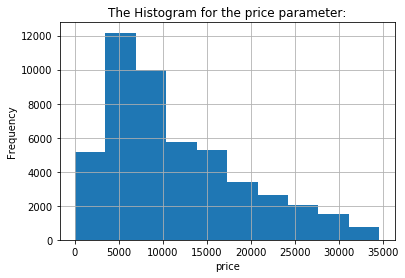

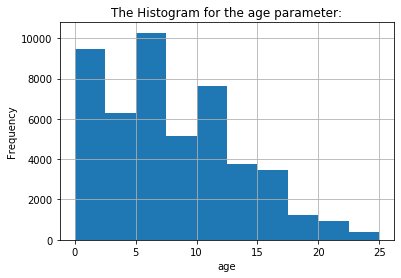

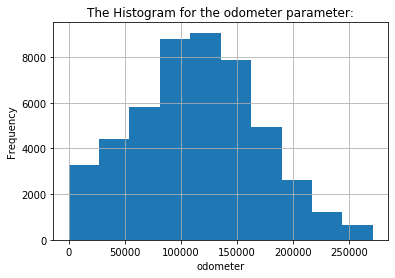

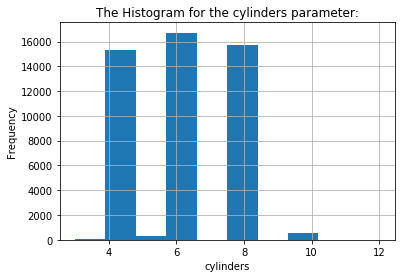

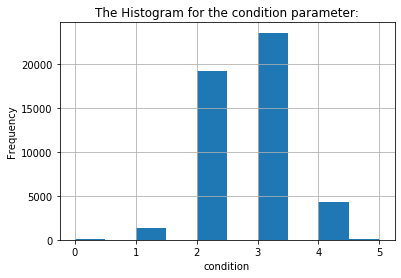

In [66]:
for i in['price','age', 'odometer', 'cylinders', 'condition']:
    filtered_vehicles[i].hist()
    
    plt.title('The Histogram for the {} parameter:'.format(i))
    plt.xlabel('{}'.format(i))
    plt.ylabel('Frequency')
    
    plt.show() # show each graph

Conclusions for each histogram:
- The 'price' histogram shows that most of the cars cost 4-6 thousand dollars.
- Mostly sold 5-7 year old cars and also cars up to 3 years old.
- Peak sales of a car with mileage from 100,000 to 125,000.
- There was no change in the 'cylinders' histogram. Most cars with 6 cylinders.
- Finally, the order of the listed conditions (3, 2, 4, 1, and 0) remained the same, but the proportions are slightly different. Most cars are sold in excellent and good condition.


Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

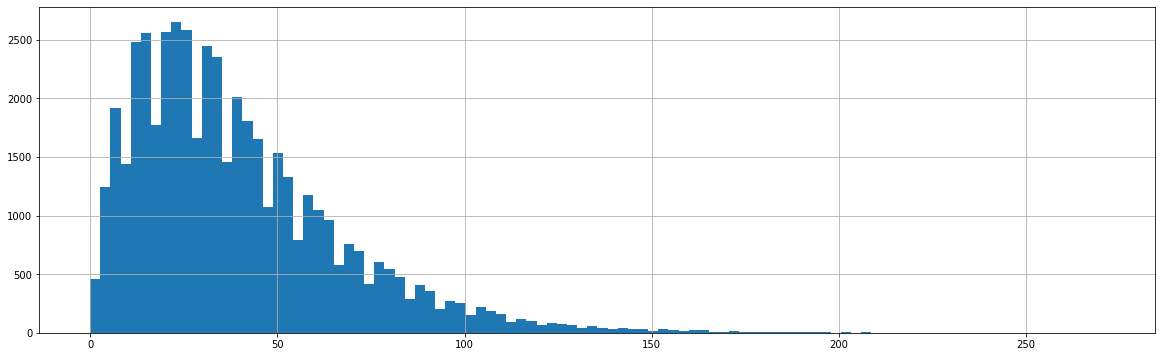

In [67]:
filtered_vehicles['days_listed'].hist(bins=100, figsize=(20,6))
plt.show()

In [68]:
filtered_vehicles['days_listed'].describe() 
#The maximum number of days is 271, the minimum is 0, median is 39.54 and the average is 33 days.

count    48641.000000
mean        39.532534
std         28.204487
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

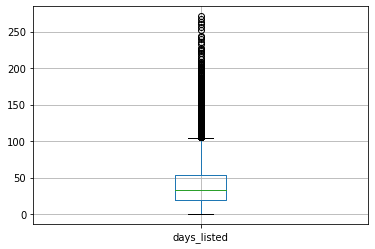

In [69]:
filtered_vehicles.boxplot(column ='days_listed')
plt.show()

In [70]:
Q1 = filtered_vehicles['days_listed'].quantile(.25)
Q3 = filtered_vehicles['days_listed'].quantile(.75)
IQR = Q3-Q1
upper_outlier_days_listed = Q3 + 1.5*IQR
print('Upper bound for Days listed:', upper_outlier_days_listed)

#The histogram and boxplot suggest any listings greater than approximately 104 days should be investigated 
#as outliers. We can see the outliers are skewing the results (the mean is higher than the median). 
#In general, the lifetime of an ad appears to be around one month. 

Upper bound for Days listed: 104.0


In [71]:
days_listed_min = filtered_vehicles.query('days_listed < 1')
days_listed_min.shape

(49, 18)

In [72]:
days_listed_min = filtered_vehicles.query('days_listed == 1')
days_listed_min.shape

(167, 18)

In [73]:
days_listed_min = filtered_vehicles.query('days_listed == 2')
days_listed_min.shape

(241, 18)

In [74]:
# outliers
days_listed_104 = filtered_vehicles.query('days_listed > 104')
days_listed_104.shape

(1519, 18)

The maximum number of days is 271, the minimum is 0, median is 39.54 and the average is 33 days. In general, the lifetime of an ad appears to be around one month. 
- 49 ads were removed on the same day as posted. The car could be sold on the same day or the owner changed his mind about selling it.
- 167 ads were removed the next day.
- 1506 listings were placed on the list for more than 104 days, and some of the listings remained active for 271 days.
- The main sale of cars falls on 1 month of placement, the peak from about 7 to 25 days


Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.


In [75]:
filtered_vehicles['price'].describe() 

count    48641.000000
mean     11343.082461
std       7694.853058
min          3.000000
25%       5300.000000
50%       9000.000000
75%      15988.000000
max      34595.000000
Name: price, dtype: float64

In [76]:
filtered_vehicles['type'].value_counts()  

sedan          12044
SUV            11955
truck          11191
pickup          6355
coupe           2046
wagon           1506
mini-van        1147
hatchback       1010
van              584
convertible      359
other            237
offroad          184
bus               23
Name: type, dtype: int64

In [77]:
filtered_vehicles['type'].nunique()

13

In [78]:
type_vehicles = filtered_vehicles.query('days_listed <= 104').pivot_table(
    index='type', values = 'price', aggfunc = 'mean').sort_values(by='price', ascending=False)

type_vehicles
# the average price per type

,price
type,
bus,17445.913043
truck,15285.520975
pickup,14968.036252
offroad,14308.125000
coupe,13781.784522
convertible,13084.071429
SUV,10629.016005
other,10481.125000
wagon,8995.515884


In [79]:
value_counts = filtered_vehicles['type'].value_counts(dropna=True, sort=True)
vehicles_val_counts = pd.DataFrame(value_counts)
vehicles_value_counts_reset = vehicles_val_counts.reset_index()
vehicles_value_counts_reset.columns = ['type', 'counts'] 
vehicles_value_counts_reset

,type,counts
0,sedan,12044
1,SUV,11955
2,truck,11191
3,pickup,6355
4,coupe,2046
5,wagon,1506
6,mini-van,1147
7,hatchback,1010
8,van,584
9,convertible,359


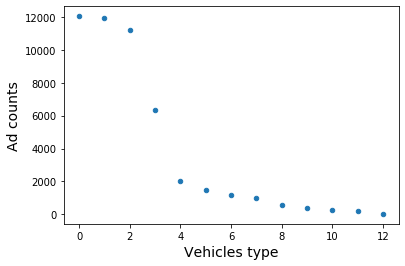

In [80]:
vehicles_value_counts_reset.reset_index().plot(kind='scatter', x='index', y='counts')
plt.ylabel('Ad counts', fontsize=14)
plt.xlabel('Vehicles type', fontsize=14)
plt.show()
#Ad counts by type of vehicle

In [81]:
vehicles_value_counts_reset.reset_index().corr()
#Correlative relationship between vehicle type

,index,counts
index,1.000000,-0.867667
counts,-0.867667,1.000000


- A total of 13 types of vehicles.
- Buses are the most expensive, but there are only 20 of them.
- 'sedan' and 'SUV' exhibit approximately the same number of slightly less than 12,000.
- The correlation between the types of vehicles is quite high and close to 1 (0.867).

What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.


In [82]:
filtered_vehicles.corr()
#From the correlation graph above, it can be seen that there is a very weak positive correlation between model_year
#and a price with a correlation value of 0.010. Likewise, age has a fairly weak negative correlation.
#with a price. 

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,avgerage_mileage_year
price,1.000000,0.011664,0.200914,0.327587,-0.475517,0.349296,-0.001505,0.000013,-0.007993,0.006654,-0.495251,0.036940
model_year,0.011664,1.000000,0.008569,-0.002933,-0.009818,-0.002933,0.001932,-0.004700,0.005079,0.000234,0.381152,-0.807822
condition,0.200914,0.008569,1.000000,-0.082523,-0.292246,-0.002113,0.000099,0.001745,-0.004903,0.006354,-0.248514,-0.012662
cylinders,0.327587,-0.002933,-0.082523,1.000000,0.125315,0.407869,0.003452,-0.004979,0.001750,-0.000570,0.139568,-0.004674
odometer,-0.475517,-0.009818,-0.292246,0.125315,1.000000,0.057300,0.004631,0.000224,0.013887,-0.010172,0.543423,0.126593
is_4wd,0.349296,-0.002933,-0.002113,0.407869,0.057300,1.000000,0.003106,0.003475,0.003532,-0.002203,0.010382,0.022735
days_listed,-0.001505,0.001932,0.000099,0.003452,0.004631,0.003106,1.000000,0.001746,-0.011344,0.011184,0.003542,-0.004440
weekday,0.000013,-0.004700,0.001745,-0.004979,0.000224,0.003475,0.001746,1.000000,0.005894,-0.006610,-0.001563,0.001067
month,-0.007993,0.005079,-0.004903,0.001750,0.013887,0.003532,-0.011344,0.005894,1.000000,-0.817738,-0.045983,0.036274
year,0.006654,0.000234,0.006354,-0.000570,-0.010172,-0.002203,0.011184,-0.006610,-0.817738,1.000000,0.062777,-0.048316


In [83]:
top_types = filtered_vehicles[filtered_vehicles.type.isin(['sedan', 'SUV'])]
print(top_types['type'].value_counts())
#Created a variable for two popular types that I discovered in the previous step.
sedan_type = filtered_vehicles[filtered_vehicles.type.isin(['sedan'])]
suv_type = filtered_vehicles[filtered_vehicles.type.isin(['SUV'])]

sedan    12044
SUV      11955
Name: type, dtype: int64


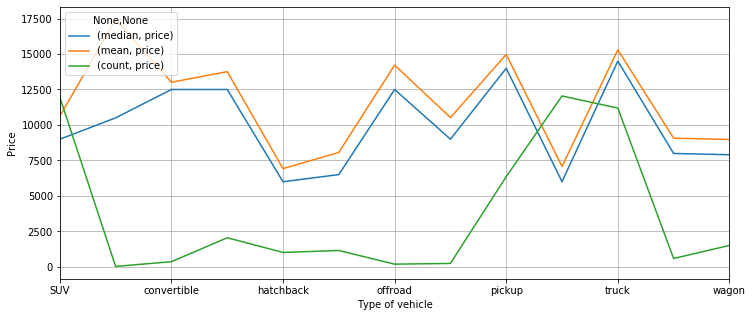

In [84]:
(filtered_vehicles
     .pivot_table(index='type', values='price', aggfunc=['median','mean', 'count'])
     .plot(grid=True, figsize=(12, 5))
) 
plt.xlabel("Type of vehicle")
plt.ylabel("Price")
plt.show()

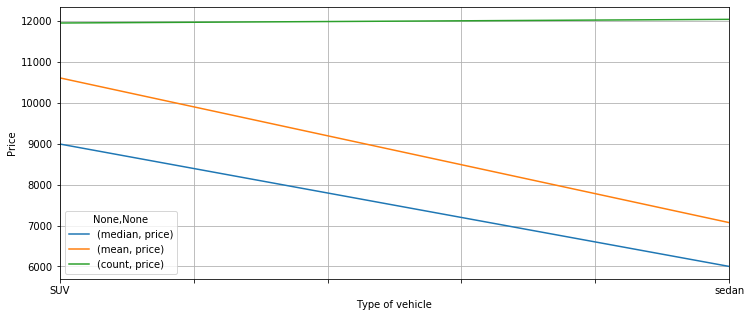

In [85]:
(top_types
     .pivot_table(index='type', values='price', aggfunc=['median','mean', 'count'])
     .plot(grid=True, figsize=(12, 5))
) 

plt.xlabel("Type of vehicle")
plt.ylabel("Price")
plt.show()


In [86]:
top_types.groupby('type')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
type,,,
SUV,11955,10613.189795,8995
sedan,12044,7071.463965,6000


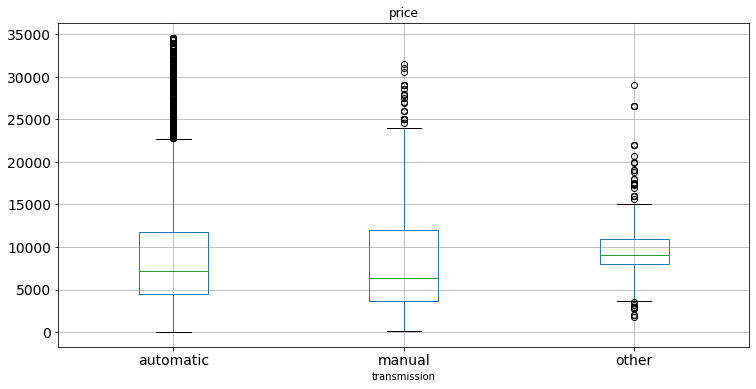

In [87]:
top_types.boxplot(by='transmission', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("")
plt.show()
#Boxplots transmission and price (sedan and SUV)

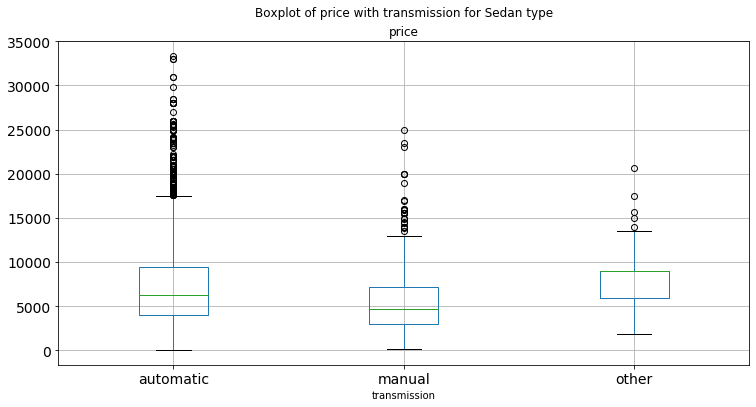

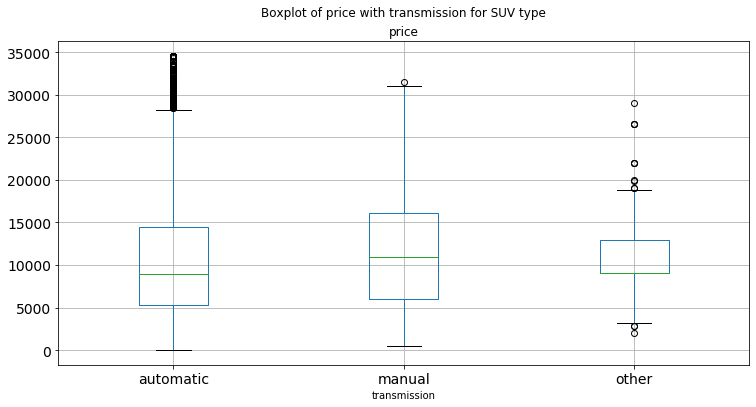

In [88]:
sedan_type.boxplot(by='transmission', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("Boxplot of price with transmission for Sedan type")
plt.show()

suv_type.boxplot(by='transmission', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("Boxplot of price with transmission for SUV type")
plt.show()

In [89]:
suv_type.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,11325.0,10568.374481,6982.802571,3.0,5300.0,8950.0,14500.0,34595.0
manual,471.0,11543.696391,6661.623340,500.0,6000.0,10900.0,16125.0,31500.0
other,159.0,11048.817610,4808.936885,2000.0,9000.0,9000.0,12900.0,28999.0


In [90]:
sedan_type.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,11332.0,7133.284063,4213.640648,12.0,3999.0,6200.0,9400.00,33390.0
manual,580.0,5595.087931,3795.565661,180.0,2995.0,4647.5,7174.75,25000.0
other,132.0,8251.409091,2941.151950,1800.0,5950.0,9000.0,9000.00,20700.0


- Most cars with automatic transmission.
- SUV is more expensive than a sedan.
- Automatic is more expensive than manual.


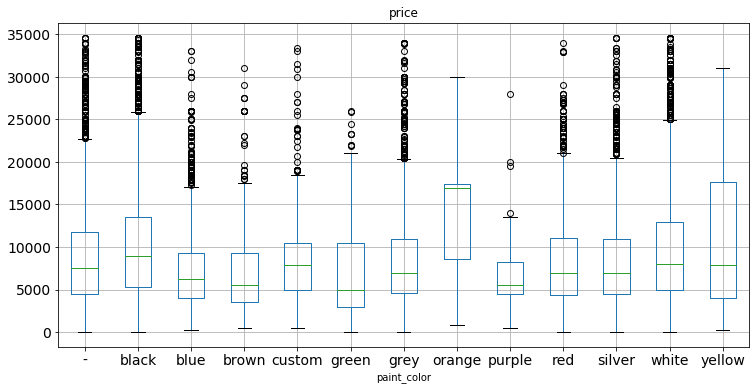

In [91]:
top_types.boxplot(by='paint_color', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("")
plt.show()
#'Boxplots paint_color and price (sedan and SUV)

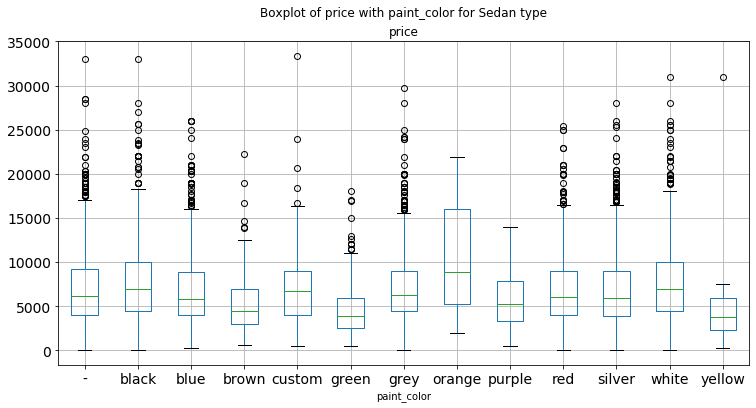

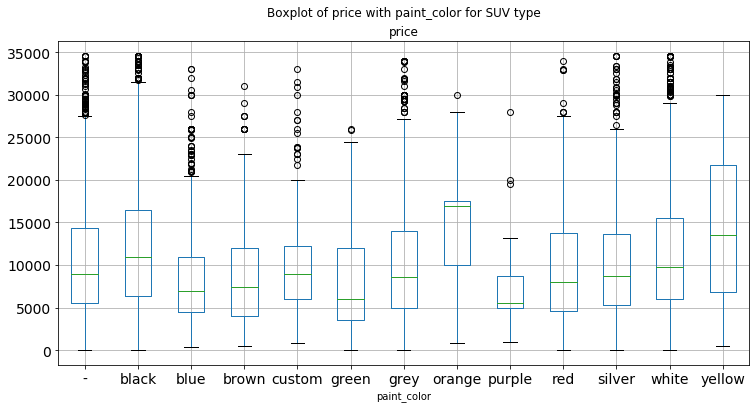

In [92]:
sedan_type.boxplot(by='paint_color', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("Boxplot of price with paint_color for Sedan type")
plt.show()

suv_type.boxplot(by='paint_color', column='price', figsize=(12,6), fontsize=14)
plt.suptitle("Boxplot of price with paint_color for SUV type")
plt.show()

In [93]:
suv_type.groupby('paint_color')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
-,2151.0,10670.633659,6958.287160,3.0,5500.0,8995.0,14322.50,34500.0
black,2106.0,12343.585945,7517.682651,69.0,6400.0,10950.0,16476.25,34545.0
white,1876.0,11531.690299,7418.514816,69.0,5990.0,9800.0,15499.25,34555.0
silver,1536.0,10084.867839,6318.691677,69.0,5300.0,8664.0,13665.00,34595.0
grey,1148.0,10425.390244,7022.935745,9.0,4995.0,8597.5,14051.50,34000.0
blue,1016.0,8618.952756,5627.457371,372.0,4500.0,6995.0,10995.00,32999.0
red,879.0,9716.395904,6579.334302,69.0,4625.0,7950.0,13800.00,34000.0
green,426.0,8046.558685,5676.166831,5.0,3500.0,6000.0,11995.00,25950.0
brown,353.0,8569.784703,5644.093248,500.0,4000.0,7399.0,11995.00,31000.0


In [94]:
sedan_type.groupby('paint_color')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
-,2169.0,7049.790226,4203.949280,12.0,3995.0,6195.0,9250.00,32999.0
silver,2038.0,6842.682532,4136.633949,12.0,3900.0,5977.5,8995.00,28000.0
black,1759.0,7623.420125,4300.149759,69.0,4450.0,6995.0,9997.00,32999.0
grey,1611.0,7084.612042,3944.280327,69.0,4399.0,6300.0,8999.00,29777.0
white,1496.0,7631.418449,4359.294995,69.0,4500.0,6925.0,9955.00,31000.0
blue,1221.0,6659.027027,4117.293433,295.0,3950.0,5800.0,8850.00,25947.0
red,936.0,7174.810897,4228.190206,35.0,4000.0,6000.0,9000.00,25390.0
custom,298.0,7326.597315,4345.956327,500.0,3995.0,6695.0,9000.00,33390.0
brown,257.0,5211.575875,3285.288721,600.0,2995.0,4495.0,6900.00,22199.0


- Most of the cars with the color "-", this is an unknown color to us, and most likely there are several of them.
- Both types have a lot of ads with black cars and they are the most expensive.
- Most ads with black SUVs and silver sedans
- Yellow, orange and purple cars are less popular.

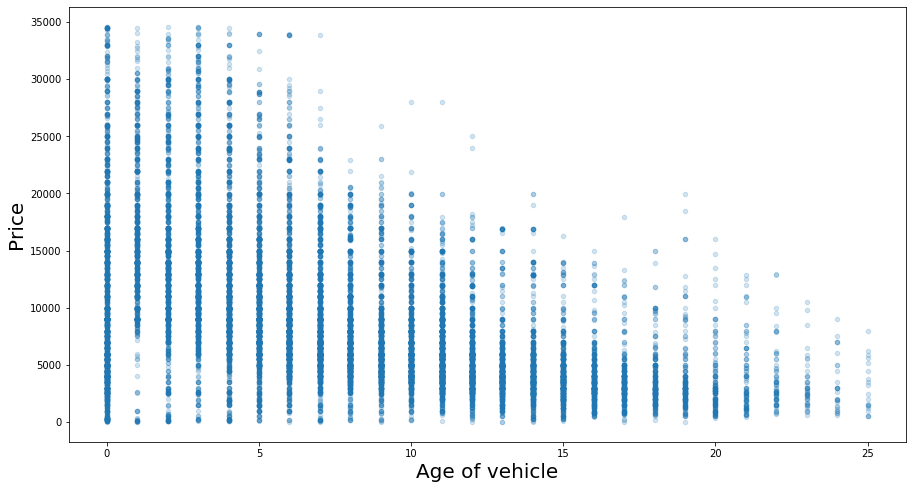

In [95]:
top_types.plot(kind='scatter', x='age', y='price', alpha=0.2, figsize = (15, 8))
plt.ylabel('Price', fontsize=20)
plt.xlabel('Age of vehicle', fontsize=20)
plt.show()
#Price by age of vehicle (sedan and SUV)

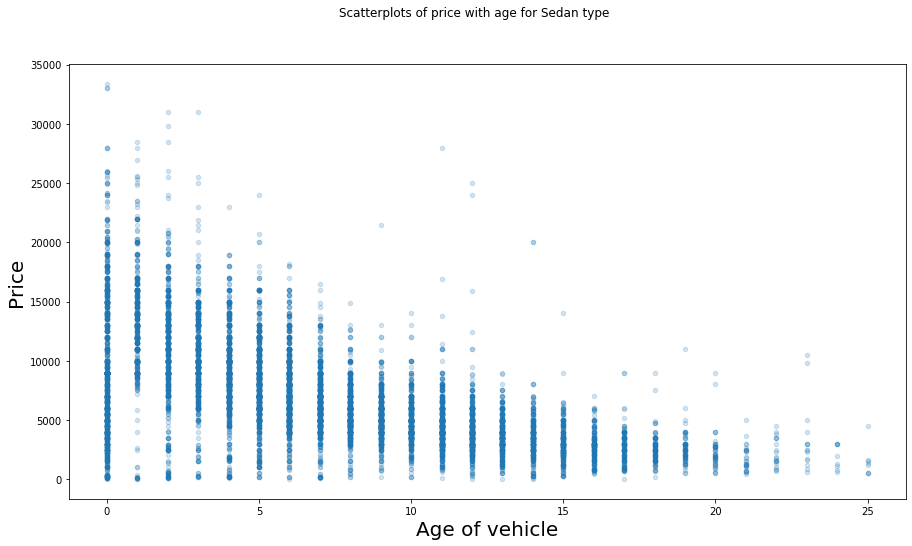

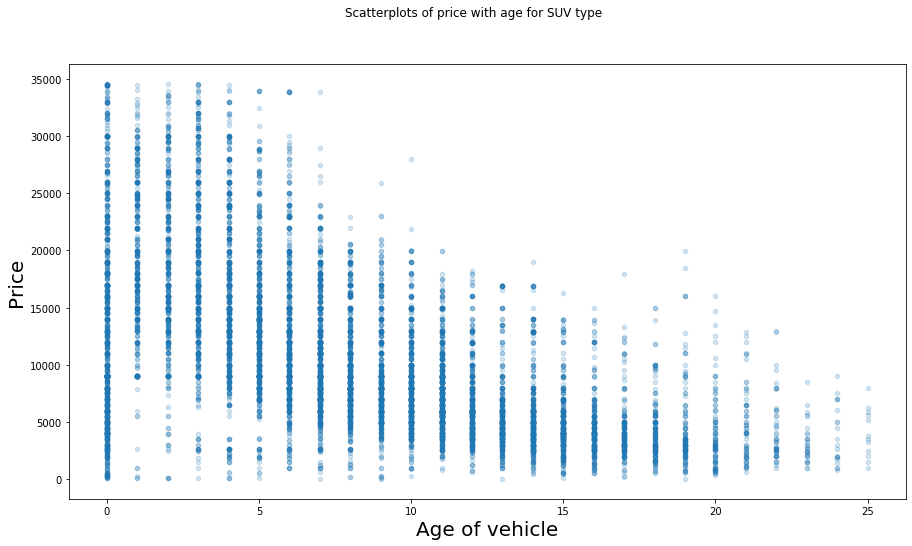

In [96]:
sedan_type.plot(kind='scatter', x='age', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with age for Sedan type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Age of vehicle', fontsize=20)
plt.show()

suv_type.plot(kind='scatter', x='age', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with age for SUV type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Age of vehicle', fontsize=20)
plt.show()

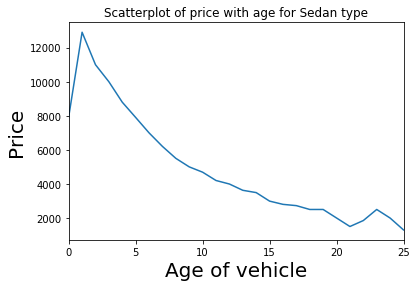

In [97]:
sedan_type.groupby('age')['price'].median().plot()

plt.title("Scatterplot of price with age for Sedan type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Age of vehicle', fontsize=20)
plt.show()

In [98]:
suv_type.groupby('age')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0,1239.0,12484.522195,8470.297844,69.0,5950.00,9500.0,17900.00,34595.0
7,912.0,10855.605263,4752.566601,5.0,7300.00,9985.0,13922.00,33900.0
11,824.0,7474.843447,3196.406366,750.0,5400.00,6950.0,8995.00,19995.0
6,785.0,12266.496815,5794.590614,999.0,8495.00,10995.0,14995.00,33995.0
5,762.0,13418.175853,5747.143319,69.0,8995.00,12900.0,15995.00,33995.0
4,758.0,15647.340369,6685.551155,69.0,10995.00,14825.0,18999.00,34500.0
8,736.0,9800.343750,4219.338831,222.0,6900.00,8977.5,11995.00,22900.0
10,730.0,8099.223288,3765.865496,289.0,5496.00,7495.0,9775.00,28000.0
3,643.0,18131.799378,7247.034707,69.0,12995.00,16995.0,23500.00,34595.0


In [99]:
sedan_type.groupby('age')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0,1230.0,8919.211382,5796.571009,12.0,4500.0,7932.0,12994.00,33390.0
6,1092.0,7357.486264,2752.189193,39.0,5500.0,6995.0,8991.25,18200.0
5,1020.0,8108.146078,3167.376257,185.0,5995.0,7900.0,9995.00,23999.0
4,943.0,8850.426299,3336.483446,69.0,6900.0,8795.0,10797.50,22977.0
7,846.0,6409.517730,2355.920898,85.0,4990.0,6200.0,7598.75,16500.0
3,750.0,10358.701333,3541.887799,180.0,8025.0,9995.0,12900.00,31000.0
2,722.0,11007.915512,4339.655312,69.0,8880.0,10995.0,13500.00,30999.0
8,718.0,5763.860724,1978.898598,176.0,4500.0,5500.0,6995.00,14900.0
9,708.0,5275.221751,1777.497188,185.0,4000.0,4999.5,6120.75,21500.0


- The most expensive are cars that are less than a year old and both types have the most ads with them.
- SUVs have the most ads with cars under one year old, 7, 11 and 6 years old.
- Sedans have the most ads with cars under one year old and 4-6 years old.
- Least of all ads for cars over 22 years old and, accordingly, they are cheaper.

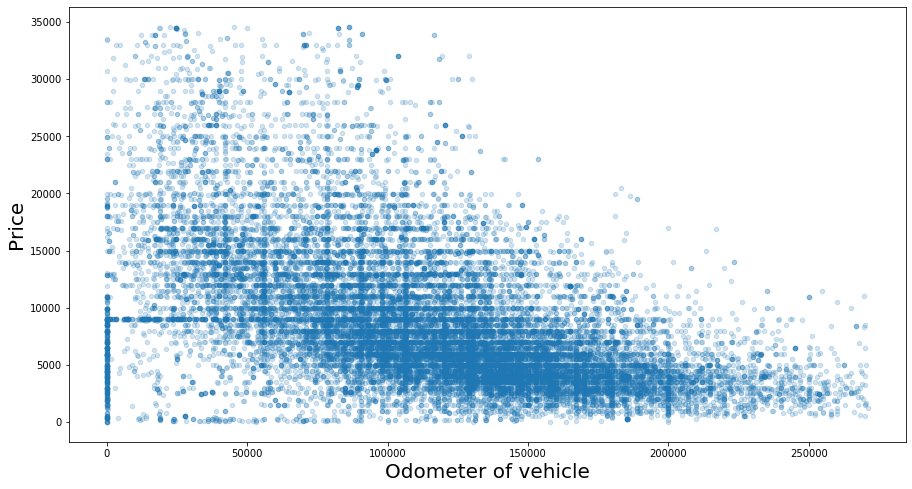

In [100]:
top_types.plot(kind='scatter', x='odometer', y='price', alpha=0.2, figsize = (15, 8))
plt.ylabel('Price', fontsize=20)
plt.xlabel('Odometer of vehicle', fontsize=20)
plt.show()
#Price by odometer (sedan and SUV)

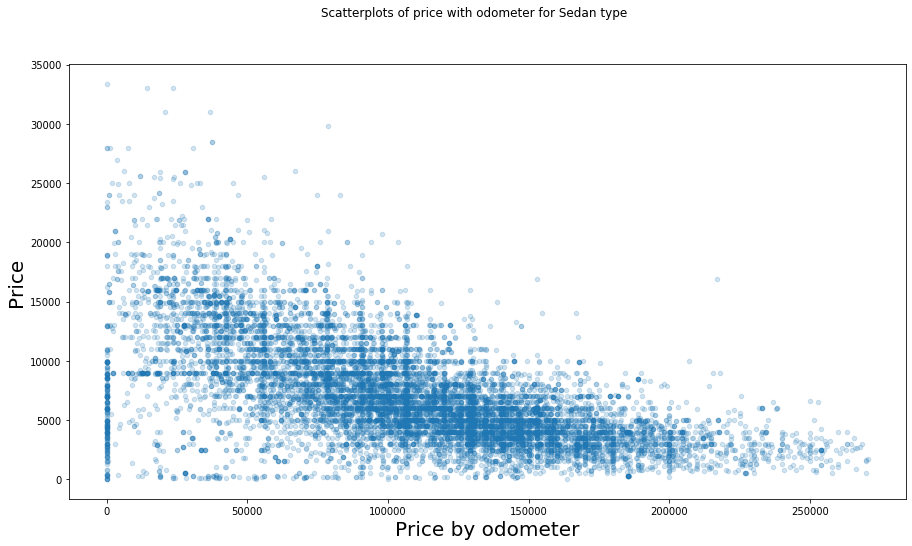

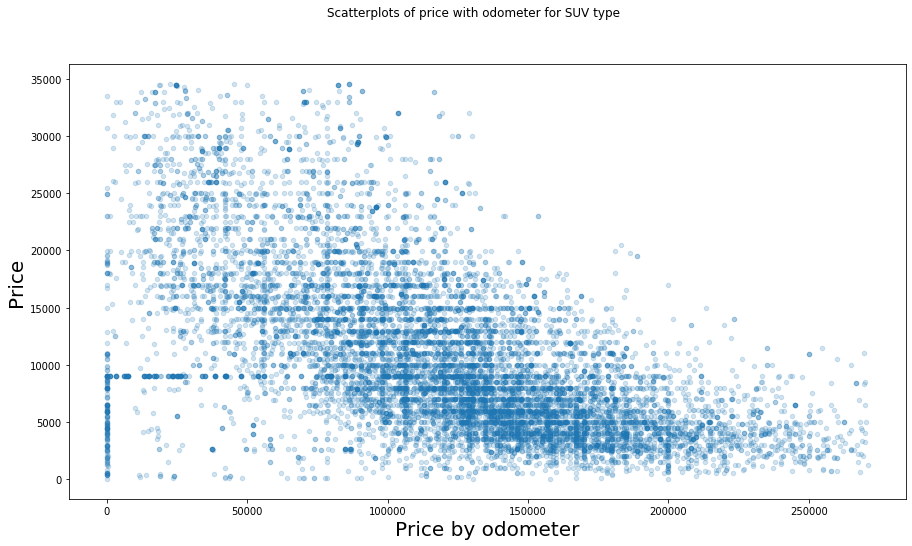

In [101]:
sedan_type.plot(kind='scatter', x='odometer', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with odometer for Sedan type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Price by odometer', fontsize=20)
plt.show()

suv_type.plot(kind='scatter', x='odometer', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with odometer for SUV type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Price by odometer', fontsize=20)
plt.show()

In the scatterplot to check linear correlation of the price with mileage. We can observe that price has a negative correlation with the mileage. As the mileage decreases, the price increases or the higher the price, the lower the mileage.

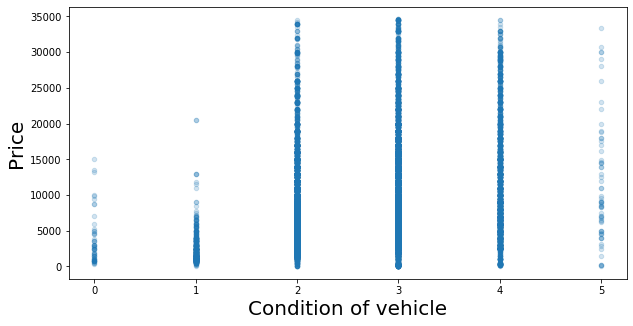

In [102]:
top_types.plot(kind='scatter', x='condition', y='price', alpha=0.2, figsize = (10, 5))
plt.ylabel('Price', fontsize=20)
plt.xlabel('Condition of vehicle', fontsize=20)
plt.show()
#Price by condition (sedan and SUV)

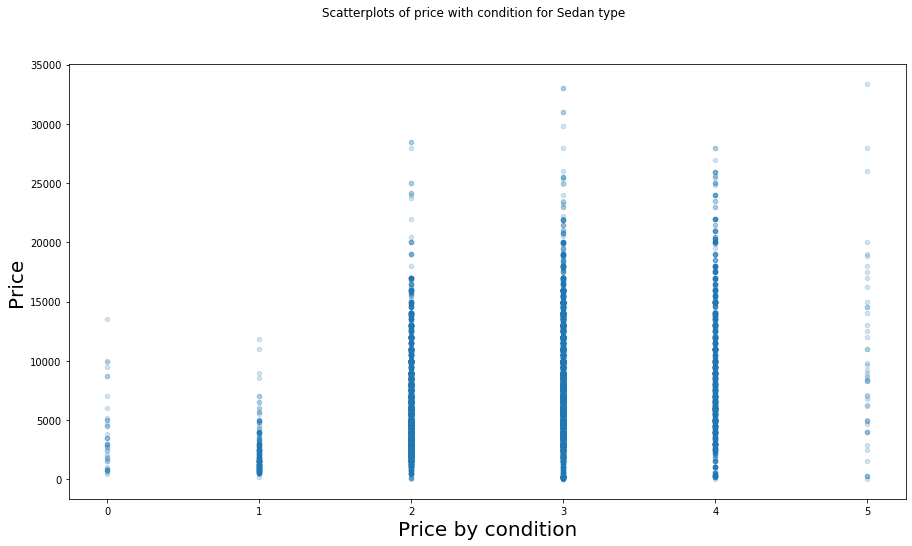

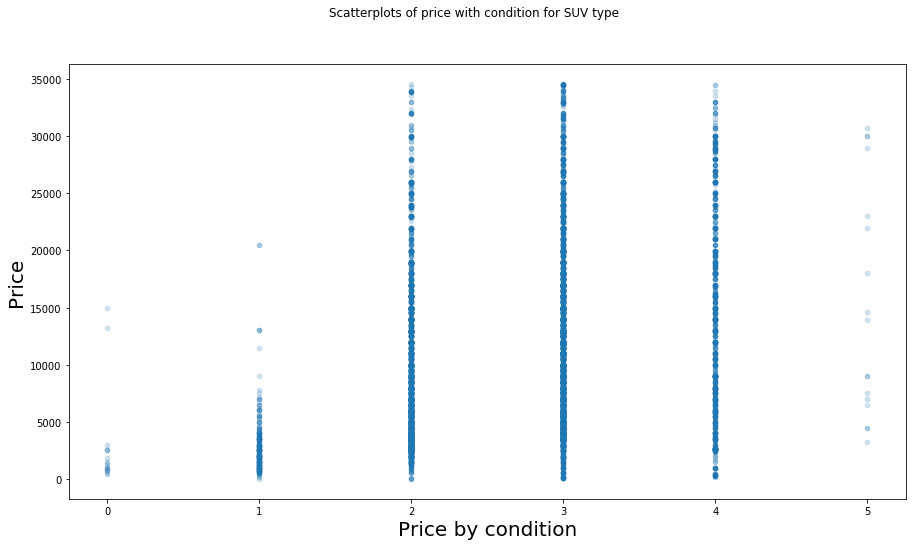

In [103]:
sedan_type.plot(kind='scatter', x='condition', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with condition for Sedan type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Price by condition', fontsize=20)
plt.show()

suv_type.plot(kind='scatter', x='condition', y='price', alpha=0.2, figsize = (15, 8))
plt.suptitle("Scatterplots of price with condition for SUV type")
plt.ylabel('Price', fontsize=20)
plt.xlabel('Price by condition', fontsize=20)
plt.show()


In [104]:
suv_type.groupby('condition')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
3,6327.0,11557.897266,6671.472708,69.0,6500.00,9950.0,14999.0,34595.0
2,4204.0,8884.911513,6153.925502,3.0,4495.00,6995.0,11990.0,34555.0
4,1091.0,13982.471127,8693.746179,200.0,6820.00,12995.0,19997.5,34500.0
1,298.0,2797.134228,2456.596224,35.0,1312.50,2262.5,3500.0,20500.0
0,18.0,2824.944444,4182.983040,450.0,849.75,1300.0,2500.0,15000.0
5,17.0,15437.000000,10118.507727,3200.0,6995.00,13900.0,23000.0,30740.0


In [105]:
sedan_type.groupby('condition')['price'].describe().sort_values(by='count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
3,6104.0,7721.125491,4093.772116,12.0,4795.0,6995.0,9995.00,32999.0
2,4268.0,5853.200797,3387.562010,12.0,3500.0,4995.0,7296.00,28500.0
4,1312.0,9025.432165,5219.544417,39.0,4999.0,7999.0,12461.25,28000.0
1,272.0,2119.886029,1652.089605,200.0,1000.0,1500.0,2525.00,11800.0
5,47.0,10291.808511,7426.042625,12.0,4950.0,8700.0,14500.00,33390.0
0,41.0,3800.243902,3126.448654,400.0,1500.0,2950.0,5000.00,13500.0


- Most ads are excellent and have a high price tag.
- About the same few ads for new and salvage.


In [106]:
top_types[['price', 'age', 'odometer', 'condition', 'transmission', 'paint_color']].corr()

,price,age,odometer,condition
price,1.000000,-0.507620,-0.510814,0.267374
age,-0.507620,1.000000,0.569131,-0.274409
odometer,-0.510814,0.569131,1.000000,-0.342606
condition,0.267374,-0.274409,-0.342606,1.000000


In [107]:
value_counts = top_types['paint_color'].value_counts(dropna=True, sort=True)
filtered_vehicles_val_counts = pd.DataFrame(value_counts)
filtered_vehicles_value_counts_reset = filtered_vehicles_val_counts.reset_index()
filtered_vehicles_value_counts_reset.columns = ['paint_color', 'counts'] 
filtered_vehicles_value_counts_reset

,paint_color,counts
0,-,4320
1,black,3865
2,silver,3574
3,white,3372
4,grey,2759
5,blue,2237
6,red,1815
7,green,631
8,brown,610
9,custom,597


In [108]:
filtered_vehicles_value_counts_reset.reset_index().corr()
#Correlative relationship between paint_color and price (sedans and SUV)

,index,counts
index,1.000000,-0.975895
counts,-0.975895,1.000000


In [109]:
value_counts = top_types['transmission'].value_counts(dropna=True, sort=True)
filtered_vehicles_val_counts = pd.DataFrame(value_counts)
filtered_vehicles_value_counts_reset = filtered_vehicles_val_counts.reset_index()
filtered_vehicles_value_counts_reset.columns = ['transmission', 'counts'] 
filtered_vehicles_value_counts_reset

,transmission,counts
0,automatic,22657
1,manual,1051
2,other,291


In [110]:
filtered_vehicles_value_counts_reset.reset_index().corr()
#Correlative relationship between transmission and  price (sedans and SUV)

,index,counts
index,1.000000,-0.880599
counts,-0.880599,1.000000


### Conclusion

- Using correlation tables, we were able to show that there is a strong relationship between 'price' and 'paint_color'.
- There is a high correlation between transmission and price, for sedans and SUVs.
- Price has a negative correlation with the mileage. As the mileage decreases, the price increases or the higher the price, the lower the mileage.
- The less years the car is, the more expensive it is. The graph clearly shows 7 years, then the price falls.

## Overall conclusion

I have looked and analyzed the histograms for the columns 'price', 'age', 'odometer', 'cylinders', 'condition' and filtered these columns from outliers. <br>
I removed the missing rows in the ‘model_year’ and ‘cylinders’ column, replaced the missing value in the ‘odometer’ column with the median, and created a new category for the missing values in the ‘paint_color’ column.
 <br> I replaced the float with integers.  <br>
The outliers were removed and a new filtered_vehicles date was created.  <br>
I used the new filtered data for histogram plotting and analysis. It was found that the minimum ad was 0 days and the maximum was 271 days. On average, the ads were located within a month.
 <br> It was found that sedans and SUVs had the most advertising, and that there was a relationship between the type of vehicle and the amount of advertising for all types of vehicles.
 <br> It turned out that there is a strong relationship between "price" and "paint_color" and there is also a high correlation between transmission and price for sedans and SUVs.
 <br> I also learned that as the mileage decreases, the price increases, or the higher the price, the less mileage.
 <br> The age of the car affects its price, the less the car is, the more expensive it is.
